In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from subprocess import check_output

from plotly import __version__
import cufflinks as cf

from plotly.offline import init_notebook_mode,plot,iplot

In [19]:
init_notebook_mode(connected=True)

In [3]:
cf.go_offline()

In [21]:
import plotly.express as px

In [20]:
data = pd.read_csv('Suicides_in_India.csv')

In [22]:
cols_name = ['State','Year of Death','Type_code','Details of Person','Gender','Age group','Total no. of Deaths']

In [23]:
data.columns = cols_name

In [24]:
data['Year of Death'].value_counts()

Year of Death
2011    19806
2005    19803
2012    19799
2001    19797
2008    19797
2007    19794
2010    19792
2002    19790
2006    19786
2003    19786
2009    19786
2004    19783
Name: count, dtype: int64

In [10]:
data.head() # knowing few of its entries

,State,Year of Death,Type_code,Details of Person,Gender,Age group,Total no. of Deaths
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   State                237519 non-null  object
 1   Year of Death        237519 non-null  int64 
 2   Type_code            237519 non-null  object
 3   Details of Person    237519 non-null  object
 4   Gender               237519 non-null  object
 5   Age group            237519 non-null  object
 6   Total no. of Deaths  237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [12]:
data.describe()

,Year of Death,Total no. of Deaths
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [25]:

edu_data = data[data['Type_code']=='Education_Status']
cause_data = data[data['Type_code']=='Causes']
mean_data = data[data['Type_code']=='Means_adopted']
profess_data = data[data['Type_code']=='Professional_Profile']
social_data = data[data['Type_code']=='Social_Status']


In [26]:
edu_data = edu_data[['Details of Person','Gender','Total no. of Deaths']]
edu_data_gb = edu_data.groupby(['Details of Person','Gender'], as_index=False).sum().sort_values('Details of Person',ascending=False)

In [27]:
edu_data_gb

,Details of Person,Gender,Total no. of Deaths
14,Primary,Female,409020
15,Primary,Male,679461
12,Post Graduate and Above,Female,6612
13,Post Graduate and Above,Male,15813
10,No Education,Female,398826
11,No Education,Male,566445
8,Middle,Female,353289
9,Middle,Male,675624
6,Matriculate/Secondary,Female,245820
7,Matriculate/Secondary,Male,523878


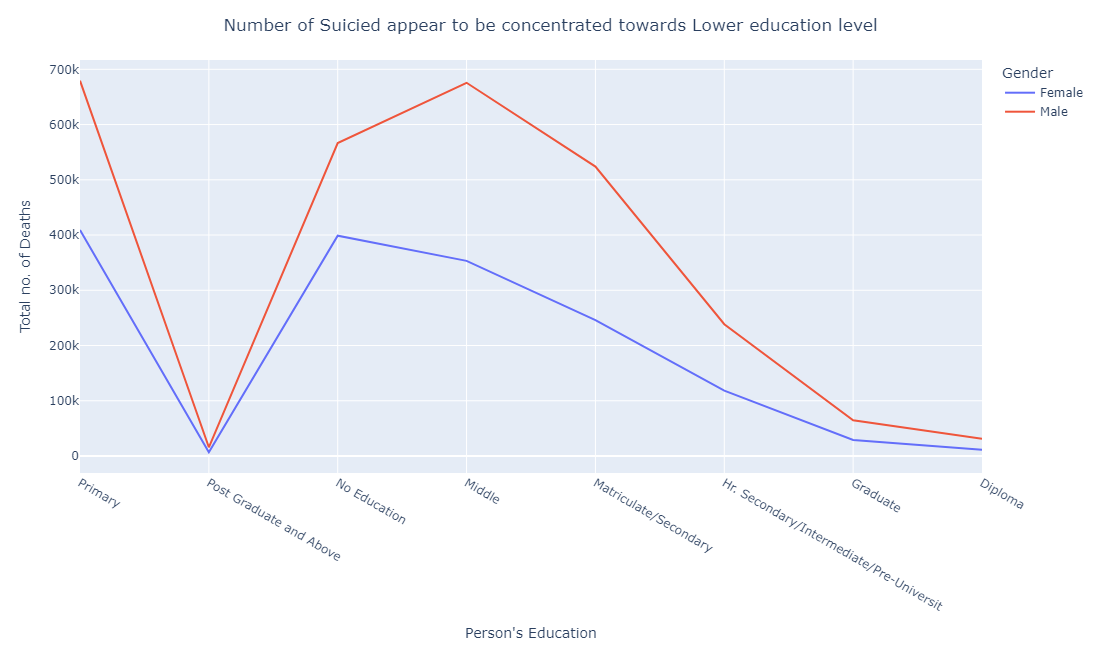

In [28]:
fig = px.line(edu_data_gb, x='Details of Person',y='Total no. of Deaths', color='Gender',height=650)
fig.update_layout(
    title={
        'text':'Number of Suicied appear to be concentrated towards Lower education level',
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
          },
    xaxis_title = "Person's Education",
    yaxis_title = "Total no. of Deaths",)
fig.show()

In [29]:
social_data = social_data[['Details of Person','Gender','Total no. of Deaths']]
social_data_gb = social_data.groupby(['Details of Person','Gender'],as_index=False).sum().sort_values('Total no. of Deaths',ascending=False)

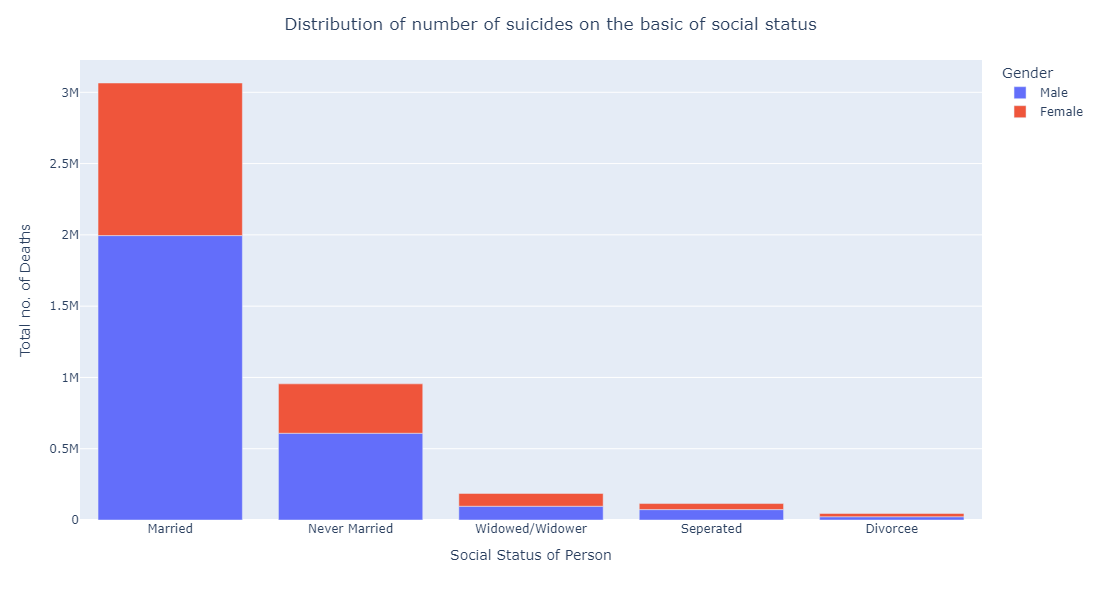

In [30]:
fig = px.bar(social_data_gb,x='Details of Person',y='Total no. of Deaths',color='Gender',height=600)
fig.update_layout(
    title={
        'text':'Distribution of number of suicides on the basic of social status',
        'y':0.97,
        'x':0.5,
        'xanchor':'center',
        'yanchor':'top'},xaxis_title='Social Status of Person',
    yaxis_title='Total no. of Deaths')
fig.show()

In [31]:
cause_data.is_copy = False

In [32]:
cause_data.loc[cause_data['Details of Person']=='Bankruptcy or sudden change in Economic','Type'] = 'change in Economic Status'
cause_data.loc[cause_data['Details of Person']=='Bankruptcy or sudden change in Economic Status','Type'] = 'change in Economic Status'
cause_data.loc[cause_data['Details of Person']=='other Causes(Please Specity)','Type'] = 'Causes Not known'
cause_data.loc[cause_data['Details of Person']=='Not having Children (Barrenness/Impotency','Type'] = 'Not having children (Barrenness/Impotency'

In [33]:
cause_data = cause_data[['Details of Person','Gender','Total no. of Deaths']]
cause_data_gb = cause_data.groupby(['Details of Person','Gender'],as_index=False).sum().sort_values('Total no. of Deaths',ascending=False)

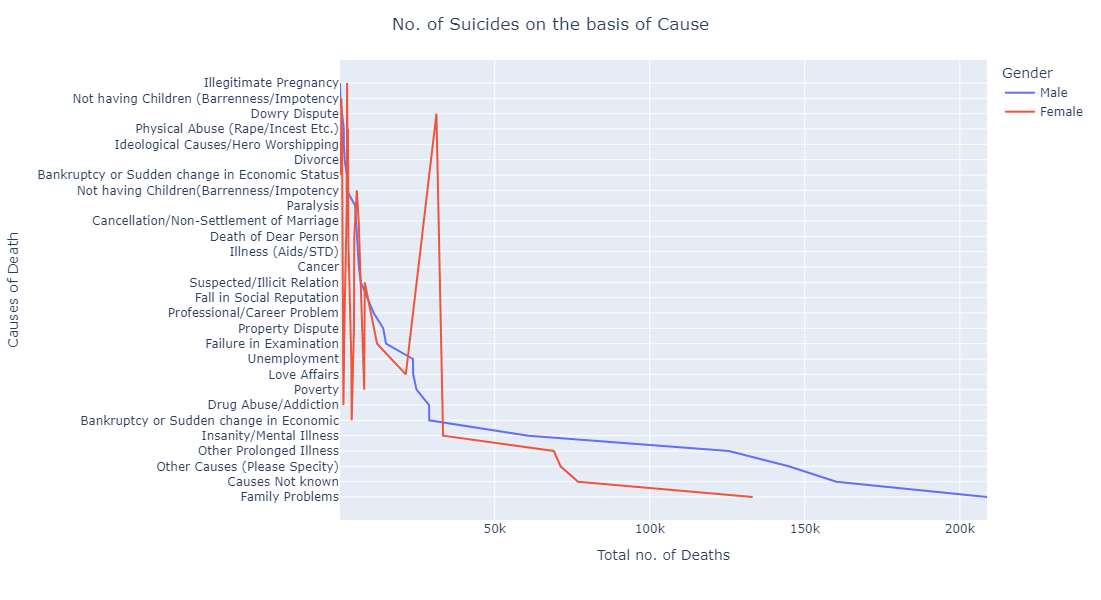

In [34]:
fig = px.line(cause_data_gb, x='Total no. of Deaths',y='Details of Person',color='Gender',height=600)
fig.update_layout(
    title={
        'text':"No. of Suicides on the basis of Cause",
        'y':0.97,
        'x':0.5,
        'xanchor':'center',
        'yanchor':'top'},xaxis_title="Total no. of Deaths",
    yaxis_title='Causes of Death')
fig.update_traces(marker=dict(size=20,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='marker'))
fig.show()

In [35]:
profess_data  = profess_data[['Details of Person','Gender','Total no. of Deaths']]
profess_data_gb = profess_data.groupby(['Details of Person','Gender'],as_index=False).sum().sort_values('Total no. of Deaths',ascending=False)

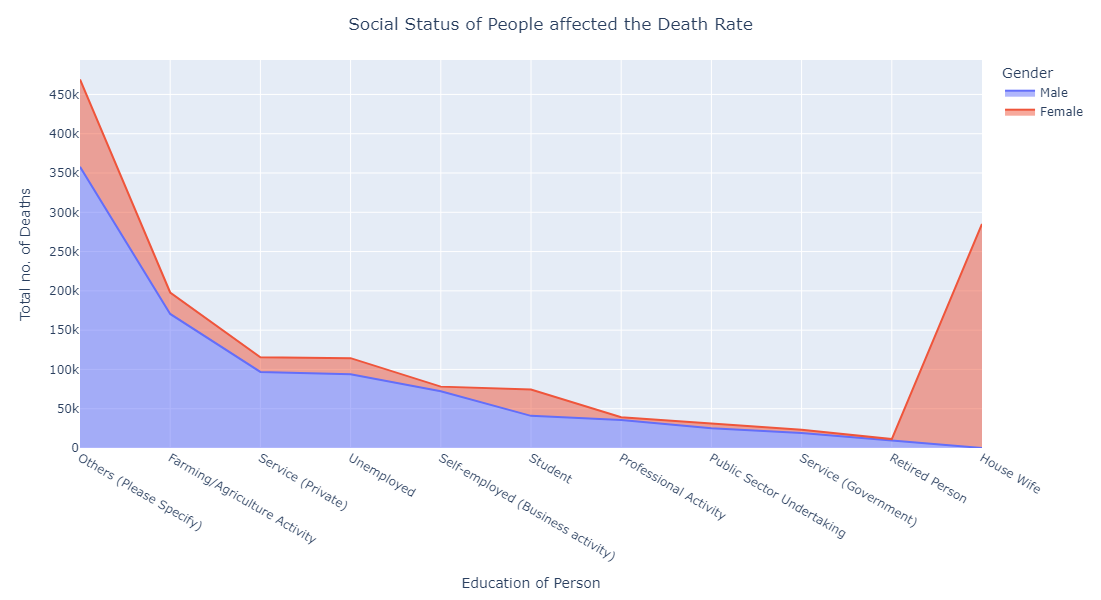

In [36]:
fig = px.area(profess_data_gb,x='Details of Person',y='Total no. of Deaths',color='Gender',height=600)
fig.update_layout(
    title={
        'text':"Social Status of People affected the Death Rate",
        'y':0.97,
        'x':0.5,
        'xanchor':'center',
        'yanchor':'top'
    },xaxis_title='Education of Person',
    yaxis_title = 'Total no. of Deaths',)
fig.show()

In [37]:
causes = data[data['Type_code']=='Causes']

In [38]:
causes_grp = causes.groupby(['State','Age group'],as_index=False).sum()
cause_grp_pvt = causes_grp.pivot(index='Age group',columns='State',values='Total no. of Deaths')

In [39]:
print(causes_grp)

             State Age group  Year of Death  \
0    A & N Islands      0-14        1252056   
1    A & N Islands     15-29        1252056   
2    A & N Islands     30-44        1252056   
3    A & N Islands     45-59        1252056   
4    A & N Islands       60+        1252056   
..             ...       ...            ...   
170    West Bengal      0-14        1252056   
171    West Bengal     15-29        1252056   
172    West Bengal     30-44        1252056   
173    West Bengal     45-59        1252056   
174    West Bengal       60+        1252056   

                                             Type_code  \
0    CausesCausesCausesCausesCausesCausesCausesCaus...   
1    CausesCausesCausesCausesCausesCausesCausesCaus...   
2    CausesCausesCausesCausesCausesCausesCausesCaus...   
3    CausesCausesCausesCausesCausesCausesCausesCaus...   
4    CausesCausesCausesCausesCausesCausesCausesCaus...   
..                                                 ...   
170  CausesCausesCausesCauses

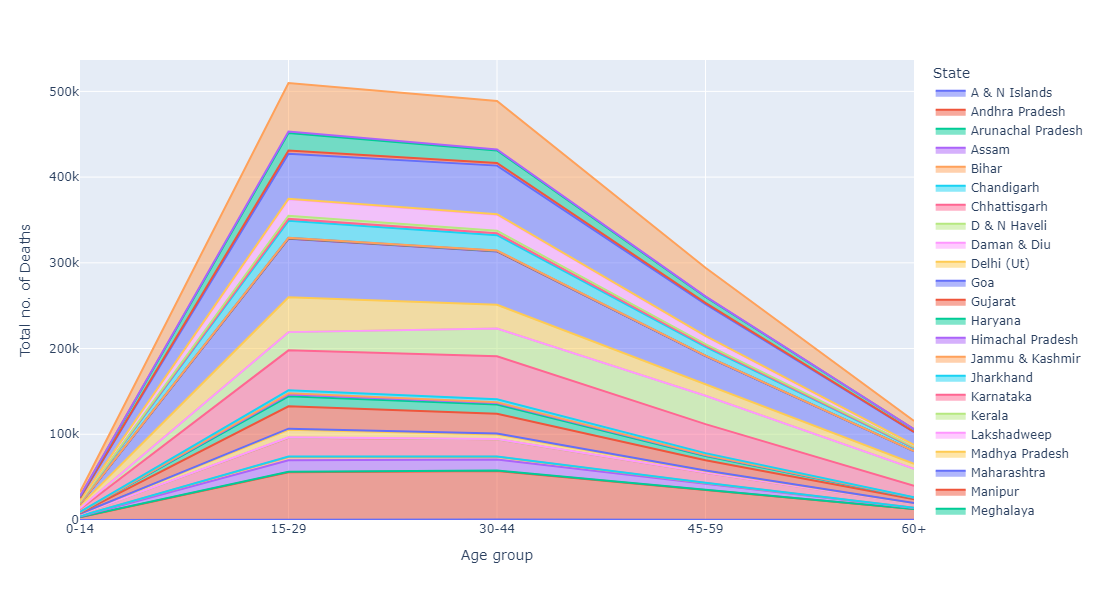

In [40]:
fig = px.area(causes_grp,x='Age group',y='Total no. of Deaths',color='State',height=600)
fig.update_layout(
    title={
        'y':0.97,
        'x':0.5,
        'xanchor':'center',
        'yanchor':'top'
    },xaxis_title='Age group',
    yaxis_title = 'Total no. of Deaths',)
fig.show()

In [41]:
data.columns

Index(['State', 'Year of Death', 'Type_code', 'Details of Person', 'Gender',
       'Age group', 'Total no. of Deaths'],
      dtype='object')

In [44]:
n = data['Total no. of Deaths'].value_counts().sort_values(ascending=False)

In [45]:
n

Total no. of Deaths
0       135481
1        16047
2         9942
3         6704
4         5121
         ...  
1472         1
992          1
2154         1
1495         1
2263         1
Name: count, Length: 2180, dtype: int64

In [49]:
# Get the most common occurrence count
most_common_death_count = data['Total no. of Deaths'].value_counts().max()

# Filter the rows where the death count matches the most frequent count
filtered_data = data[data['Total no. of Deaths'].map(data['Total no. of Deaths'].value_counts()) == most_common_death_count]



In [50]:
# overall_data = data[data['Year of Death']]
overall_data_grp = data.groupby(['Year of Death','Total no. of Deaths'],as_index=False).sum()

In [51]:
overall_data_grp

,Year of Death,Total no. of Deaths,State,Type_code,Details of Person,Gender,Age group
0,2001,0,A & N IslandsA & N IslandsA & N IslandsA & N I...,CausesCausesCausesCausesCausesCausesCausesCaus...,Illness (Aids/STD)Bankruptcy or Sudden change ...,FemaleFemaleFemaleFemaleFemaleFemaleFemaleFema...,0-140-140-140-140-140-140-140-140-140-140-140-...
1,2001,1,A & N IslandsA & N IslandsA & N IslandsA & N I...,CausesCausesCausesCausesCausesCausesCausesCaus...,Love AffairsOther Causes (Please Specity)Other...,FemaleFemaleMaleMaleMaleFemaleFemaleFemaleMale...,0-140-140-140-1415-2930-4430-4445-5945-5960+60...
2,2001,2,A & N IslandsA & N IslandsA & N IslandsA & N I...,CausesCausesCausesCausesCausesCausesCausesCaus...,Failure in ExaminationInsanity/Mental IllnessI...,FemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMa...,15-2915-2915-2930-4430-4430-4445-5945-5960+0-1...
3,2001,3,A & N IslandsA & N IslandsA & N IslandsA & N I...,CausesCausesCausesCausesCausesCausesCausesMean...,Other Prolonged IllnessFamily ProblemsLove Aff...,MaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFe...,15-2915-2915-2930-4430-4445-5945-5945-5960+15-...
4,2001,4,A & N IslandsA & N IslandsA & N IslandsA & N I...,CausesCausesCausesCausesEducation_StatusMeans_...,Other Causes (Please Specity)Family ProblemsOt...,MaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemale...,15-2930-4445-5960+0-100+15-2945-5915-2945-590-...
...,...,...,...,...,...,...,...
8183,2012,20748,Total (All India),Education_Status,Middle,Male,0-100+
8184,2012,31335,Total (States),Social_Status,Married,Female,0-100+
8185,2012,31921,Total (All India),Social_Status,Married,Female,0-100+
8186,2012,62123,Total (States),Social_Status,Married,Male,0-100+


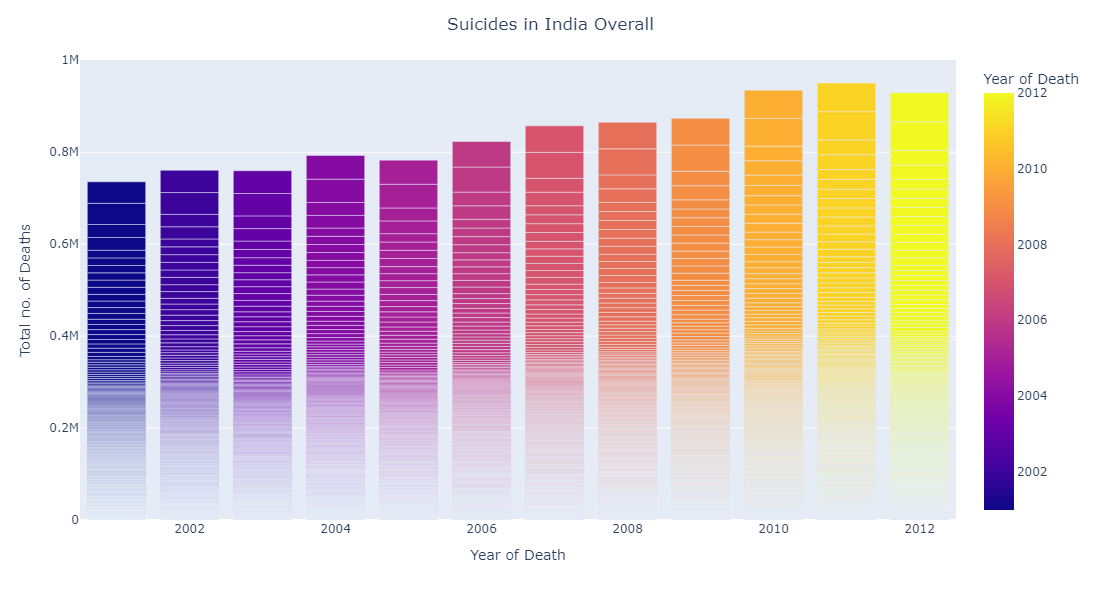

In [52]:
fig = px.bar(overall_data_grp,x='Year of Death',y='Total no. of Deaths',color='Year of Death',height=600)
fig.update_layout(
    title={
        'text':"Suicides in India Overall",
        'y':0.97,
        'x':0.5,
        'xanchor':'center',
        'yanchor':'top'
    }
)
fig.show()

In [53]:
data = pd.read_csv('Suicides_in_India.csv',parse_dates=['Year'])

In [54]:
data.columns=cols_name

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   State                237519 non-null  object        
 1   Year of Death        237519 non-null  datetime64[ns]
 2   Type_code            237519 non-null  object        
 3   Details of Person    237519 non-null  object        
 4   Gender               237519 non-null  object        
 5   Age group            237519 non-null  object        
 6   Total no. of Deaths  237519 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 12.7+ MB


In [56]:
edu_data = data[data['Type_code']=='Education_Status']

In [58]:
edu_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7296 entries, 260 to 237238
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   State                7296 non-null   object        
 1   Year of Death        7296 non-null   datetime64[ns]
 2   Type_code            7296 non-null   object        
 3   Details of Person    7296 non-null   object        
 4   Gender               7296 non-null   object        
 5   Age group            7296 non-null   object        
 6   Total no. of Deaths  7296 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 456.0+ KB


In [59]:
edu_data['Year of Death'].min()

Timestamp('2001-01-01 00:00:00')

In [60]:
edu_data['Year of Death'].max()

Timestamp('2012-01-01 00:00:00')

In [61]:
edu_data = edu_data[['Year of Death','Total no. of Deaths']]

In [62]:
edu_data = edu_data.sort_values('Year of Death')

In [63]:
edu_data = edu_data.set_index('Year of Death')

In [64]:
 edu_data

,Total no. of Deaths
Year of Death,
2001-01-01,0
2001-01-01,4
2001-01-01,22
2001-01-01,25
2001-01-01,40
...,...
2012-01-01,0
2012-01-01,0
2012-01-01,2


In [65]:
y = edu_data['Total no. of Deaths'].resample('YS').mean()

In [66]:
y


Year of Death
2001-01-01    535.391447
2002-01-01    544.820724
2003-01-01    546.962171
2004-01-01    561.004934
2005-01-01    562.075658
2006-01-01    582.789474
2007-01-01    605.116776
2008-01-01    616.860197
2009-01-01    627.389803
2010-01-01    664.139803
2011-01-01    669.004934
2012-01-01    668.314145
Freq: YS-JAN, Name: Total no. of Deaths, dtype: float64

In [67]:
import matplotlib.pyplot as plt

<Axes: xlabel='Year of Death'>

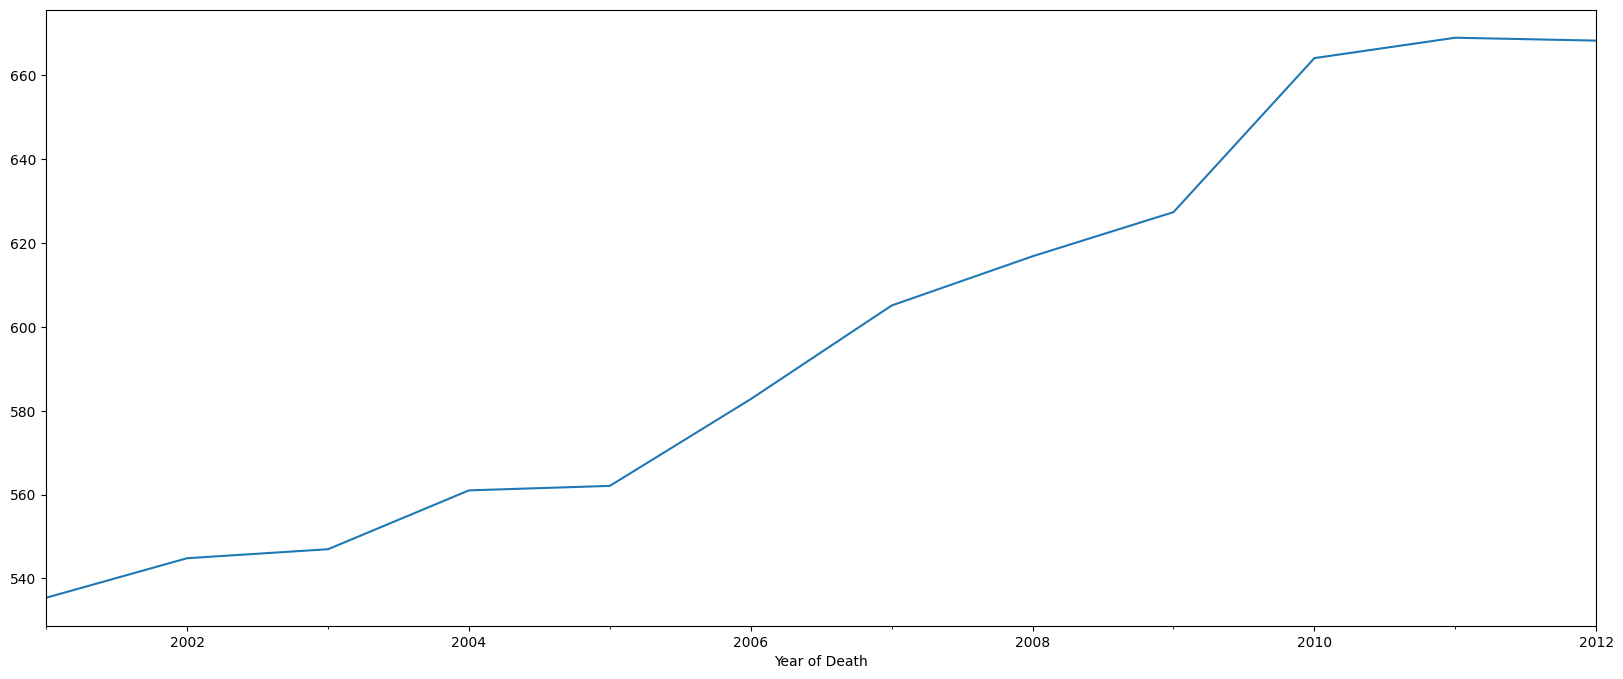

In [68]:
y.plot(figsize=(20,8))

In [75]:
import statsmodels.api as sm
import statsmodels

In [74]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.5 MB/s eta 0:00:07
   ---- ----------------------------------- 1.0/9.8 MB 2.2 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/9.8 MB 2.6 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/9.8 MB 2.7 MB/s eta 0:00:03
   ----------- ---------------------------- 2.9/9.8 MB 3.0 MB/s eta 0:00:03
   ------------- -------------------------- 3.4/9.8 MB 2.6 MB/s eta 0:00:03
   ----------------- ---------------------- 4.2/9.8 MB 2.7 MB/s eta 0:00:03
   -------------------- ------------------- 5.0/9.8 MB 2.9 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.8 MB 3.1 MB/s eta 0:00:02
   --------------------------- ------------ 6.8/9.8 MB 3.2 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.8 MB 3.1 MB/s eta 0:00:01
   -----------------------

In [76]:
decom = sm.tsa.seasonal_decompose(y,model='additive')

In [77]:

from pylab import rcParams

In [78]:
rcParams['figure.figsize'] = 18,10

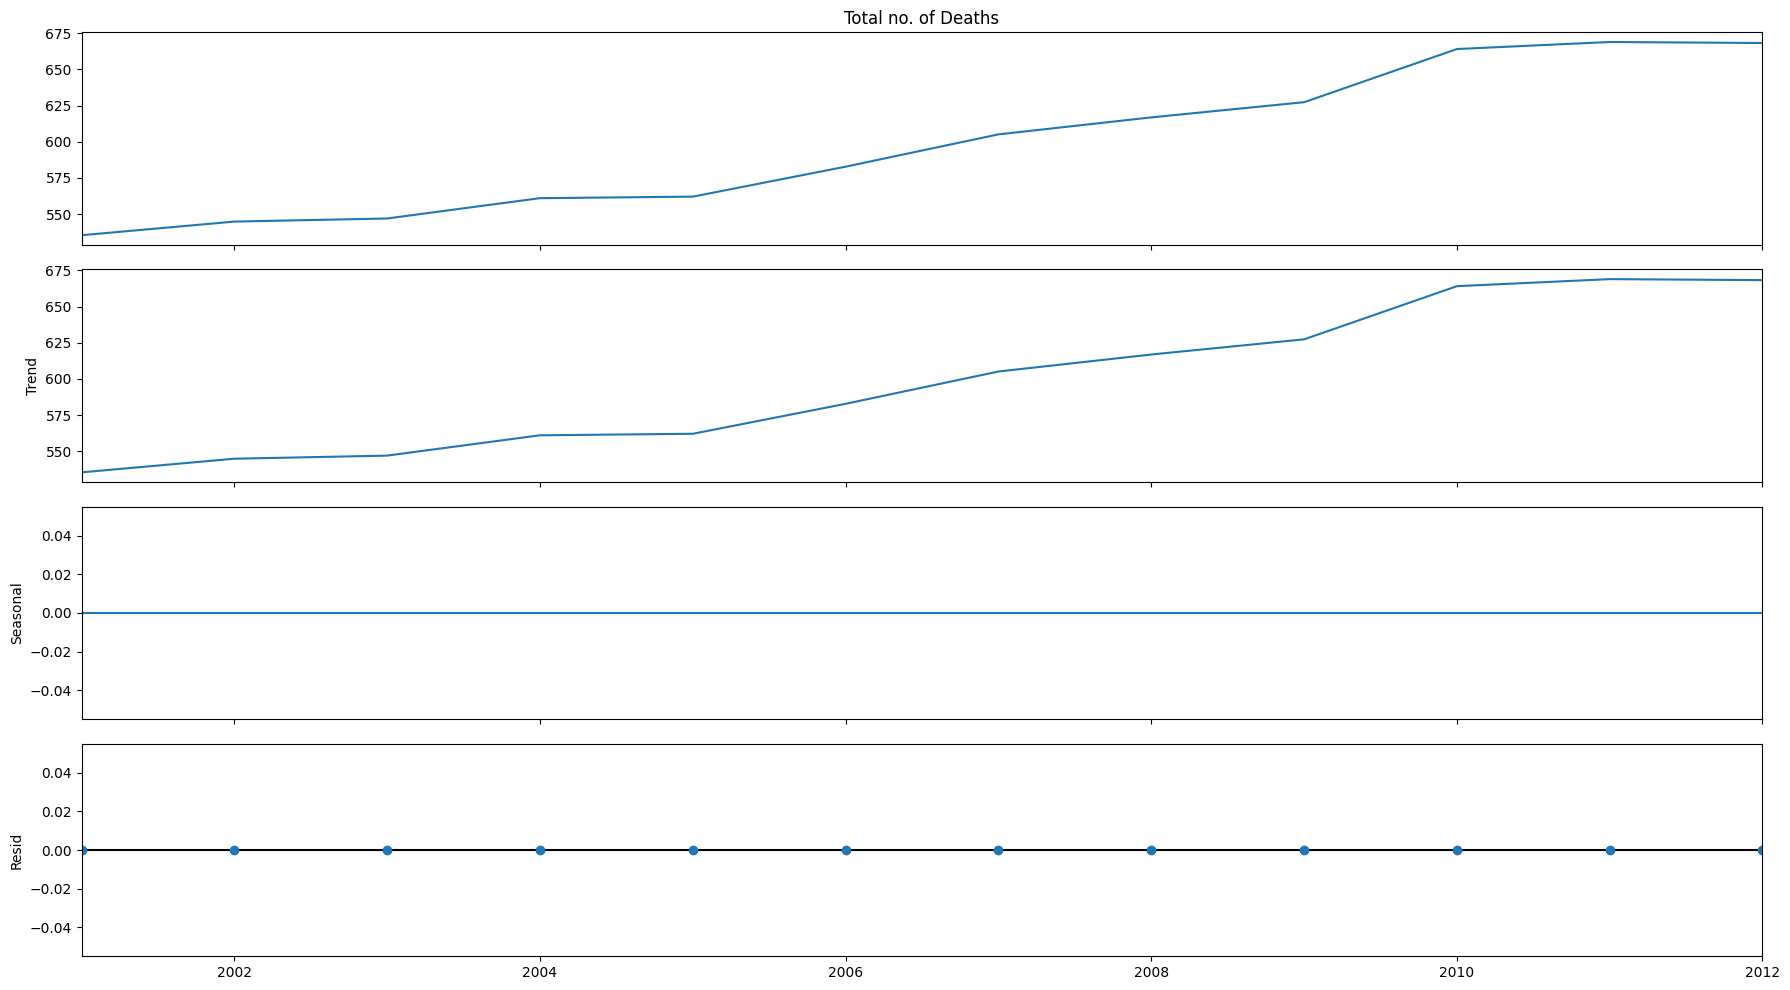

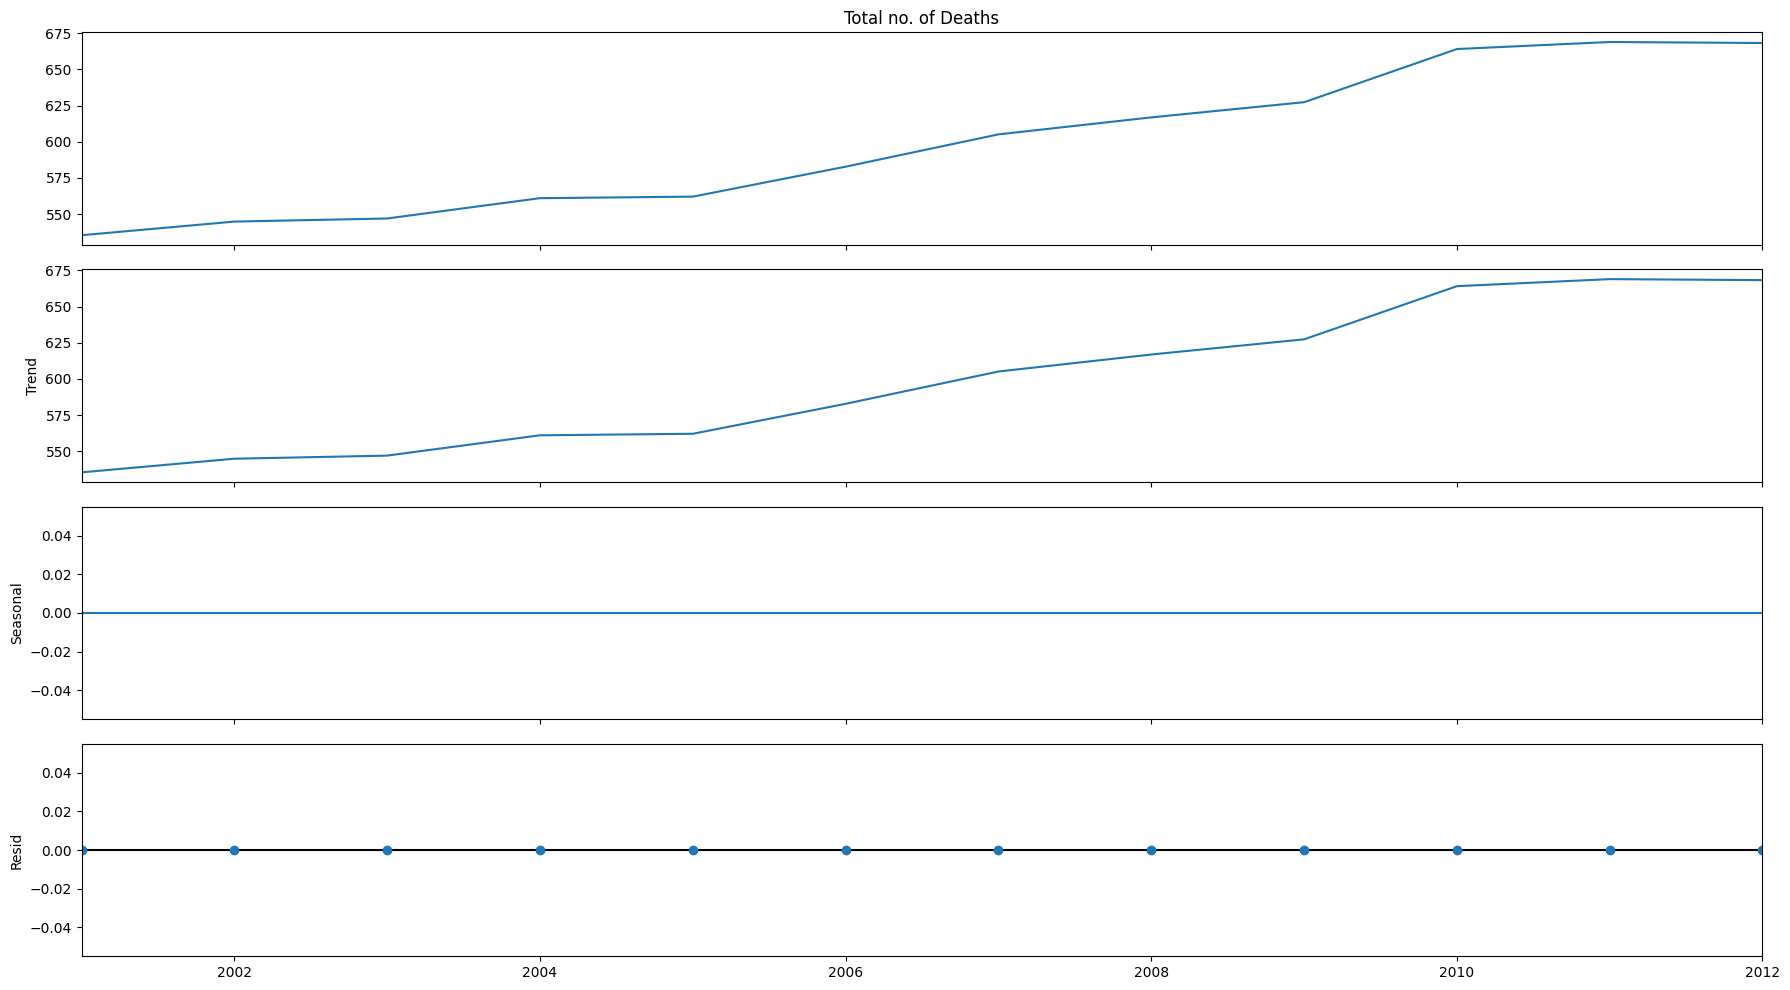

In [79]:
decom.plot()

In [80]:
p = d = q = range(0,2)
import itertools
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [( x[0],x[1],x[2],12) for x in pdq]

In [81]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit()
        print (param, param_seasonal, results.aic)

(0, 0, 0) (0, 0, 0, 12) 174.17425363147157
(0, 0, 0) (0, 0, 1, 12) 4.0
(0, 0, 0) (0, 1, 0, 12) 2.0


C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



(0, 0, 0) (0, 1, 1, 12) 4.0
(0, 0, 0) (1, 0, 0, 12) 4.0
(0, 0, 0) (1, 0, 1, 12) 6.0
(0, 0, 0) (1, 1, 0, 12) 4.0
(0, 0, 0) (1, 1, 1, 12) 6.0
(0, 0, 1) (0, 0, 0, 12) 149.86005006779908
(0, 0, 1) (0, 0, 1, 12) 6.0
(0, 0, 1) (0, 1, 0, 12) 4.0


C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1235: RuntimeWarning:

invalid value encountered in divide

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Progra

(0, 0, 1) (0, 1, 1, 12) 6.0
(0, 0, 1) (1, 0, 0, 12) 6.0
(0, 0, 1) (1, 0, 1, 12) 8.0
(0, 0, 1) (1, 1, 0, 12) 6.0
(0, 0, 1) (1, 1, 1, 12) 8.0
(0, 1, 0) (0, 0, 0, 12) 86.56098672781988
(0, 1, 0) (0, 0, 1, 12) 4.0
(0, 1, 0) (0, 1, 0, 12) 2.0
(0, 1, 0) (0, 1, 1, 12) 4.0
(0, 1, 0) (1, 0, 0, 12) 4.0
(0, 1, 0) (1, 0, 1, 12) 6.0


C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1235: RuntimeWarning:

invalid value encountered in divide

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Progr

(0, 1, 0) (1, 1, 0, 12) 4.0
(0, 1, 0) (1, 1, 1, 12) 6.0
(0, 1, 1) (0, 0, 0, 12) 78.97588215560297
(0, 1, 1) (0, 0, 1, 12) 6.0
(0, 1, 1) (0, 1, 0, 12) 4.0
(0, 1, 1) (0, 1, 1, 12) 6.0
(0, 1, 1) (1, 0, 0, 12) 6.0
(0, 1, 1) (1, 0, 1, 12) 8.0
(0, 1, 1) (1, 1, 0, 12) 6.0
(0, 1, 1) (1, 1, 1, 12) 8.0


C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All p

(1, 0, 0) (0, 0, 0, 12) 87.29985074424839
(1, 0, 0) (0, 0, 1, 12) 6.0
(1, 0, 0) (0, 1, 0, 12) 4.0
(1, 0, 0) (0, 1, 1, 12) 6.0
(1, 0, 0) (1, 0, 0, 12) 6.0
(1, 0, 0) (1, 0, 1, 12) 8.0
(1, 0, 0) (1, 1, 0, 12) 6.0
(1, 0, 0) (1, 1, 1, 12) 8.0


C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning:

invalid value encountered in divide

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning:

invalid value encountered in scala

(1, 0, 1) (0, 0, 0, 12) 80.16421440346079
(1, 0, 1) (0, 0, 1, 12) 8.0
(1, 0, 1) (0, 1, 0, 12) 6.0
(1, 0, 1) (0, 1, 1, 12) 8.0
(1, 0, 1) (1, 0, 0, 12) 8.0
(1, 0, 1) (1, 0, 1, 12) 10.0
(1, 0, 1) (1, 1, 0, 12) 8.0
(1, 0, 1) (1, 1, 1, 12) 10.0
(1, 1, 0) (0, 0, 0, 12) 85.18184058950413
(1, 1, 0) (0, 0, 1, 12) 6.0


C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All p

(1, 1, 0) (0, 1, 0, 12) 4.0
(1, 1, 0) (0, 1, 1, 12) 6.0
(1, 1, 0) (1, 0, 0, 12) 6.0
(1, 1, 0) (1, 0, 1, 12) 8.0
(1, 1, 0) (1, 1, 0, 12) 6.0
(1, 1, 0) (1, 1, 1, 12) 8.0


C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning:

invalid value encountered in divide

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set t

(1, 1, 1) (0, 0, 0, 12) 77.34984304680358
(1, 1, 1) (0, 0, 1, 12) 8.0
(1, 1, 1) (0, 1, 0, 12) 6.0
(1, 1, 1) (0, 1, 1, 12) 8.0
(1, 1, 1) (1, 0, 0, 12) 8.0
(1, 1, 1) (1, 0, 1, 12) 10.0
(1, 1, 1) (1, 1, 0, 12) 8.0
(1, 1, 1) (1, 1, 1, 12) 10.0


C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All p

In [82]:
model = sm.tsa.statespace.SARIMAX(y, order=(0,1,0), seasonal_order=(0,1,0,12), enforce_invertibility=False, enforce_stationarity=False)

In [83]:
results = model.fit()

In [84]:
results.summary()

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tools\eval_measures.py:414: RuntimeWarning:

invalid value encountered in log

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tools\eval_measures.py:439: RuntimeWarning:

invalid value encountered in log

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3016: RuntimeWarning:

divide by zero encountered in divide

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:472: RuntimeWarning:

Mean of empty slice.

C:\Users\harshal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning:

invalid value encountered in scalar divide



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                Total no. of Deaths   No. Observations:                   12
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                   0.000
Date:                            Mon, 21 Oct 2024   AIC                              2.000
Time:                                    11:34:49   BIC                                nan
Sample:                                01-01-2001   HQIC                               nan
                                     - 01-01-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10          0        inf      0.000       1e-10       1e-10
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [85]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'),dynamic=False)

In [86]:
pred.conf_int()

,lower Total no. of Deaths,upper Total no. of Deaths
2019-01-01,-505.336787,2695.270997


In [87]:
y['2012-01-01']

np.float64(668.3141447368421)